# Multi Validation

Validate multiple simulations

In [1]:
# imports
from pathlib import Path
from matplotlib import pyplot as plt
from multisim import MultiSim
from plotlabelmanager import PlotLabelManager
from rich import print

# set plotting style
plt.style.use(["default", "biophysics.mplstyle"])

# import simulation data to the MultiSim class
data_dir = Path("data/tests")
multisim = MultiSim(file_dir=data_dir)

# define figure save location
fig_dir = Path("figures")
fig_dir.mkdir(exist_ok=True)

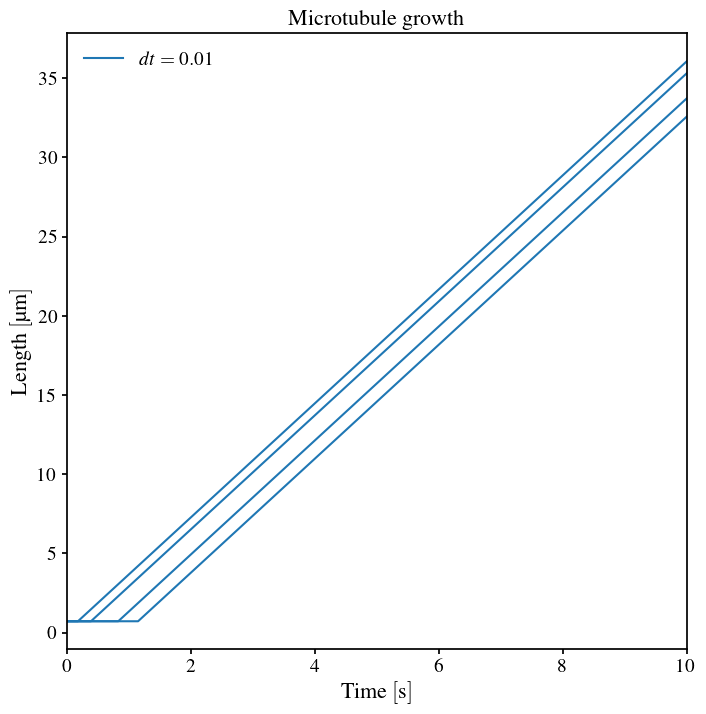

In [3]:
# plot the length at each time
fig, ax = plt.subplots()

# define a label manager
plm = PlotLabelManager(
    args_map_dict={'color': list(plt.get_cmap('tab10').colors),
})

# iterate over each simulation
for sim in multisim.get_iter():
    # generate the plot label
    dt = sim.get_param('dt')
    plm.try_add(
        key=dt,
        text=f"$dt={dt}$"
    )

    # get the length and time vectors
    time = sim.get_time_vec()
    length = sim.get_length_vec()

    # plot the length
    ax.plot(time, length, **plm.get_args(dt))

# add axis labels
ax.set_xlabel(r"Time $\left[\qty{}{\second}\right]$")
ax.set_ylabel(r"Length $\left[\qty{}{\micro\meter}\right]$")

# add title
ax.set_title("Microtubule growth")

# add legend to the upper-left
ax.legend()

# save figure
fig_name = fig_dir / "microtubule_growth"
fig.savefig(fig_name)